In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_csv('student_performance_prediction.csv')
df.shape

(40000, 7)

# Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [8]:
df.isna().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

## Filling Nulls

In [13]:
mean = df['Study Hours per Week'].mean()
df['Study Hours per Week'] = df['Study Hours per Week'].fillna(mean)
df.isna().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [15]:
mean = df['Attendance Rate'].mean()
df['Attendance Rate'] = df['Attendance Rate'].fillna(mean)
df.isna().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [17]:
mean = df['Previous Grades'].mean()
df['Previous Grades'] = df['Previous Grades'].fillna(mean)
df.isna().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [19]:
df['Participation in Extracurricular Activities'] = df['Participation in Extracurricular Activities'].ffill().bfill()
df.isna().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities       0
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [21]:
df['Parent Education Level'] = df['Parent Education Level'].ffill().bfill()
df.isna().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities       0
Parent Education Level                            0
Passed                                         2000
dtype: int64

In [23]:
df['Passed'] = df['Passed'].ffill().bfill()
df.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         40000 non-null  float64
 2   Attendance Rate                              40000 non-null  float64
 3   Previous Grades                              40000 non-null  float64
 4   Participation in Extracurricular Activities  40000 non-null  object 
 5   Parent Education Level                       40000 non-null  object 
 6   Passed                                       40000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [27]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,40000.000000,40000.000000,40000.000000
mean,9.962744,75.276323,65.440107
std,4.904081,19.879124,16.086510
min,-12.300000,-14.300000,8.300000
25%,6.800000,62.400000,55.700000
50%,9.962744,75.276323,65.440107
75%,13.200000,87.900000,74.600000
max,32.400000,150.200000,200.000000


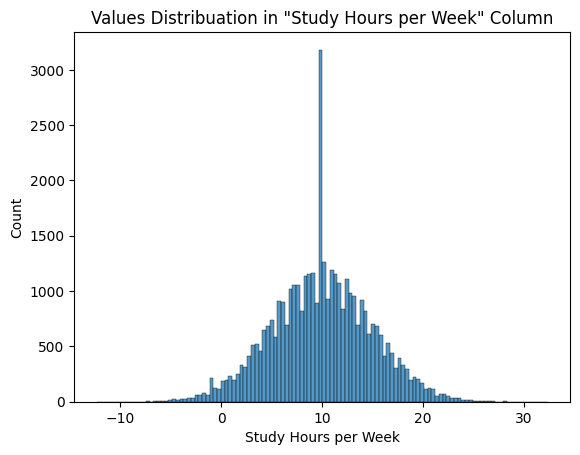

In [29]:
sns.histplot(df['Study Hours per Week'])
plt.title('Values Distribuation in \"Study Hours per Week\" Column')
plt.show()

In [31]:
#As the plot shows there are some unrealistic values 
df = df[df['Study Hours per Week'] >= 0]
df.shape

(39059, 7)

In [33]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,39059.000000,39059.000000,39059.000000
mean,10.247768,75.284626,65.433071
std,4.594340,19.885777,16.050722
min,-0.000000,-14.300000,8.300000
25%,7.000000,62.400000,55.700000
50%,9.962744,75.276323,65.440107
75%,13.300000,88.000000,74.600000
max,32.400000,150.200000,200.000000


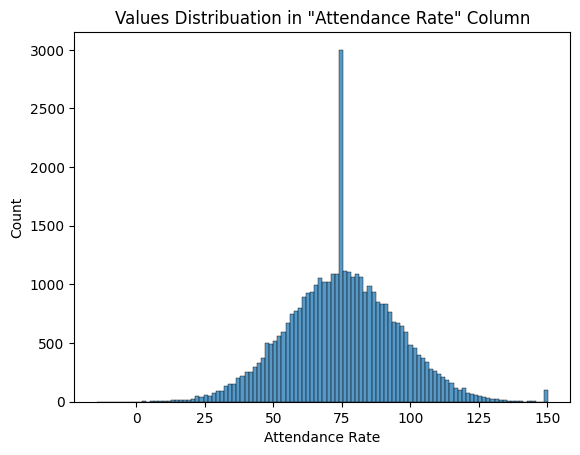

In [35]:
sns.histplot(df['Attendance Rate'])
plt.title('Values Distribuation in \"Attendance Rate\" Column')
plt.show()

In [37]:
#As the plot shows there are some unrealistic values so let's remove them
df = df[df['Attendance Rate'] >= 0]
df.shape

(39054, 7)

In [39]:
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,39054.000000,39054.000000,39054.000000
mean,10.248033,75.295251,65.432383
std,4.594439,19.864796,16.051399
min,0.000000,0.500000,8.300000
25%,7.000000,62.400000,55.700000
50%,9.962744,75.276323,65.440107
75%,13.300000,88.000000,74.600000
max,32.400000,150.200000,200.000000


In [41]:
df.shape

(39054, 7)

In [43]:
df['Participation in Extracurricular Activities'].value_counts()

Participation in Extracurricular Activities
No     19568
Yes    19486
Name: count, dtype: int64

In [45]:
df['Parent Education Level'].value_counts()

Parent Education Level
Bachelor       7925
High School    7889
Associate      7823
Doctorate      7813
Master         7604
Name: count, dtype: int64

In [47]:
df['Passed'].value_counts()

Passed
Yes    19580
No     19474
Name: count, dtype: int64

In [49]:
encoder = LabelEncoder()
df['encoded_Participation_in_Extracurricular_Activities'] = encoder.fit_transform(df['Participation in Extracurricular Activities'])
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,encoded_Participation_in_Extracurricular_Activities
0,S00001,12.5,75.276323,75.0,Yes,Master,Yes,1
1,S00002,9.3,95.300000,60.6,No,High School,No,0
2,S00003,13.2,75.276323,64.0,No,Associate,No,0
3,S00004,17.6,76.800000,62.4,Yes,Bachelor,No,1
4,S00005,8.8,89.300000,72.7,No,Master,No,0


In [51]:
df['encoded_Passed'] = encoder.fit_transform(df['Passed'])
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,encoded_Participation_in_Extracurricular_Activities,encoded_Passed
0,S00001,12.5,75.276323,75.0,Yes,Master,Yes,1,1
1,S00002,9.3,95.300000,60.6,No,High School,No,0,0
2,S00003,13.2,75.276323,64.0,No,Associate,No,0,0
3,S00004,17.6,76.800000,62.4,Yes,Bachelor,No,1,0
4,S00005,8.8,89.300000,72.7,No,Master,No,0,0


In [53]:
df = pd.get_dummies(data=df, prefix=['Parent Education Level'], columns=['Parent Education Level'])
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Passed,encoded_Participation_in_Extracurricular_Activities,encoded_Passed,Parent Education Level_Associate,Parent Education Level_Bachelor,Parent Education Level_Doctorate,Parent Education Level_High School,Parent Education Level_Master
0,S00001,12.5,75.276323,75.0,Yes,Yes,1,1,False,False,False,False,True
1,S00002,9.3,95.300000,60.6,No,No,0,0,False,False,False,True,False
2,S00003,13.2,75.276323,64.0,No,No,0,0,True,False,False,False,False
3,S00004,17.6,76.800000,62.4,Yes,No,1,0,False,True,False,False,False
4,S00005,8.8,89.300000,72.7,No,No,0,0,False,False,False,False,True


In [55]:
df['Parent Education Level_Associate'] = df['Parent Education Level_Associate'].astype(int)
df['Parent Education Level_Bachelor'] = df['Parent Education Level_Bachelor'].astype(int)
df['Parent Education Level_Doctorate'] = df['Parent Education Level_Doctorate'].astype(int)
df['Parent Education Level_High School'] = df['Parent Education Level_High School'].astype(int)
df['Parent Education Level_Master'] = df['Parent Education Level_Master'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39054 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Student ID                                           39054 non-null  object 
 1   Study Hours per Week                                 39054 non-null  float64
 2   Attendance Rate                                      39054 non-null  float64
 3   Previous Grades                                      39054 non-null  float64
 4   Participation in Extracurricular Activities          39054 non-null  object 
 5   Passed                                               39054 non-null  object 
 6   encoded_Participation_in_Extracurricular_Activities  39054 non-null  int64  
 7   encoded_Passed                                       39054 non-null  int64  
 8   Parent Education Level_Associate                     39054 non-null  in

In [57]:
x1 = df['Study Hours per Week'].to_numpy()
x2 = df['Attendance Rate'].to_numpy()
x3 = df['Previous Grades'].to_numpy()
x4 = df['encoded_Participation_in_Extracurricular_Activities'].to_numpy()
x5 = df['Parent Education Level_Associate'].to_numpy()
x6 = df['Parent Education Level_Bachelor'].to_numpy()
x7 = df['Parent Education Level_Doctorate'].to_numpy()
x8 = df['Parent Education Level_High School'].to_numpy()
x9 = df['Parent Education Level_Master'].to_numpy()
x = np.stack((x1,x2,x3,x4,x5,x6,x7,x8,x9), axis=1)
y = df['encoded_Passed'].to_numpy()

In [59]:
x.shape

(39054, 9)

In [61]:
y.shape

(39054,)

In [63]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=0.5, random_state=42)
print(x_train.shape)
print(y_train.shape)

(31243, 9)
(31243,)


In [65]:
print(x_val.shape)
print(y_val.shape)

(3905, 9)
(3905,)


In [67]:
print(x_test.shape)
print(y_test.shape)

(3906, 9)
(3906,)


# Model Selection

## Logistic Regression

In [70]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [72]:
y_train_pred = model1.predict(x_train)
y_val_pred = model1.predict(x_val)
print(f'Model1 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model1 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model1 F1-Score on training set = 0.4957107034446351
Model1 F1-Score on validation set = 0.501039501039501


In [74]:
# AS we see LogisticRegression's results was soo bad, let's try DecisionTreeClassifier

## Decision Tree

In [76]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
y_train_pred = model2.predict(x_train)
y_val_pred = model2.predict(x_val)
print(f'Model2 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model2 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model2 F1-Score on training set = 0.9998396459382316
Model2 F1-Score on validation set = 0.5003849114703618


In [80]:
# As we see DecisionTreeClassifier's results on the training set was very good but in the validation set was very bad and this 
# refers to that the model overfits or in other words it has high varience, let's try to tune its parameters to solve this problem

In [82]:
ccp_alphas = model2.cost_complexity_pruning_path(x_train,y_train).ccp_alphas
size = ccp_alphas.shape
size

(4213,)

In [84]:
models = []
for i in range(0,ccp_alphas.shape[0],100):
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[i])
    model.fit(x_train,y_train)
    models.append(model)

In [86]:
training_scores = []
validation_scores = []
for model in models:
    y_train_pred = model.predict(x_train)
    training_scores.append(f1_score(y_train,y_train_pred))
    y_val_pred = model.predict(x_val)
    validation_scores.append(f1_score(y_val, y_val_pred))

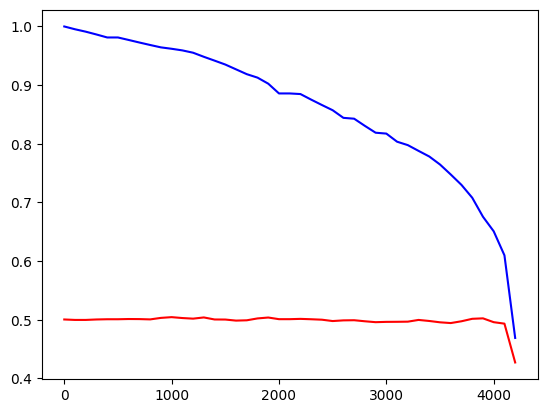

In [88]:
plt.plot(range(0,ccp_alphas.shape[0],100), training_scores, color='blue')
plt.plot(range(0,ccp_alphas.shape[0],100), validation_scores, color='red')
plt.show()

In [90]:
ccp_alphas[3600]

np.float64(6.0784178426530366e-05)

In [92]:
model3 = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[3400])
model3.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [94]:
y_train_pred = model3.predict(x_train)
y_val_pred = model3.predict(x_val)
print(f'Model3 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model3 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model3 F1-Score on training set = 0.7781789792134283
Model3 F1-Score on validation set = 0.4978143481614811


In [96]:
# It seems that using DecisionTreeClassifier with max_depth equal 5 will generalizes will as the gap 
# between the training f1_score and the validation f1_score becomes very samll so the problem of overfitting has been handled
# but the model now underfits so we need to try to enhance the model's performace as this small f1_score will not be acceptable
# let's try to tune some hyperparameters

In [98]:
model4 = DecisionTreeClassifier(max_depth=5, min_samples_split=7)
model4.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,7
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [100]:
y_train_pred = model4.predict(x_train)
y_val_pred = model4.predict(x_val)
print(f'Model4 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model4 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model4 F1-Score on training set = 0.2833309769546161
Model4 F1-Score on validation set = 0.271523178807947


In [102]:
model5 = DecisionTreeClassifier(max_depth=6, min_samples_split=8)
model5.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [104]:
y_train_pred = model5.predict(x_train)
y_val_pred = model5.predict(x_val)
print(f'Model5 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model5 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model5 F1-Score on training set = 0.5902321506789312
Model5 F1-Score on validation set = 0.5733536187785264


In [106]:
model6 = DecisionTreeClassifier(max_depth=20, min_samples_split=8, min_samples_leaf=5)
model6.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,20
,min_samples_split,8
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [108]:
y_train_pred = model6.predict(x_train)
y_val_pred = model6.predict(x_val)
print(f'Model6 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model6 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model6 F1-Score on training set = 0.6516085790884718
Model6 F1-Score on validation set = 0.48464163822525597


In [110]:
# It seem that DecisionTreeClassifier's score can't be enhanced so let's try another model

# Random Forest

In [112]:
model7 = RandomForestClassifier()
model7.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:
y_train_pred = model7.predict(x_train)
y_val_pred = model7.predict(x_val)
print(f'Model7 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model7 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model7 F1-Score on training set = 0.9998396665063332
Model7 F1-Score on validation set = 0.5010288065843621


In [119]:
model8 = RandomForestClassifier(n_estimators=64)
model8.fit(x_train, y_train)

,n_estimators,64
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [121]:
y_train_pred = model8.predict(x_train)
y_val_pred = model8.predict(x_val)
print(f'Model8 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model8 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model8 F1-Score on training set = 0.999839687069159
Model8 F1-Score on validation set = 0.48351077642170864


In [123]:
model9 = RandomForestClassifier(n_estimators=40)
model9.fit(x_train, y_train)

,n_estimators,40
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [125]:
y_train_pred = model9.predict(x_train)
y_val_pred = model9.predict(x_val)
print(f'Model9 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model9 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model9 F1-Score on training set = 0.9995189069566054
Model9 F1-Score on validation set = 0.4865289040020926


In [127]:
model10 = RandomForestClassifier(n_estimators=10)
model10.fit(x_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [129]:
y_train_pred = model10.predict(x_train)
y_val_pred = model10.predict(x_val)
print(f'Model10 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model10 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

Model10 F1-Score on training set = 0.9786115348414527
Model10 F1-Score on validation set = 0.4596100278551532


## MLP Neural Network

In [132]:
model11 = Sequential([
    tf.keras.Input(shape=(9,)),
    Dense(units=25, activation='relu', name='layer1'),
    Dense(units=15, activation='relu', name='layer2'),
    Dense(units=1, activation='sigmoid', name='output_layer')
])
model11.compile(loss=BinaryCrossentropy(),
                optimizer=Adam())

In [134]:
model11.fit(x_train,y_train)

977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8530


In [136]:
y_train_pred = (model11.predict(x_train) >= 0.5).astype(int)
y_val_pred = (model11.predict(x_val) >= 0.5).astype(int)
print(f'Model11 F1-Score on training set = {f1_score(y_train, y_train_pred)}')
print(f'Model11 F1-Score on validation set = {f1_score(y_val, y_val_pred)}')

977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model11 F1-Score on training set = 0.65134977316624
Model11 F1-Score on validation set = 0.6560827684623618


# Model Testing

In [148]:
# As we see model_11 is the best model we got as it has the f1-score, so let's test it using the testing set  

In [152]:
y_test_pred = (model11.predict(x_test) >= 0.5).astype(int)
print(f'Model_13 F1-Score on testing set = {f1_score(y_test, y_test_pred)}')

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Model_13 F1-Score on testing set = 0.6568383658969804


In [156]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.43      0.07      0.11      1890
           1       0.51      0.92      0.66      2016

    accuracy                           0.51      3906
   macro avg       0.47      0.49      0.39      3906
weighted avg       0.47      0.51      0.39      3906



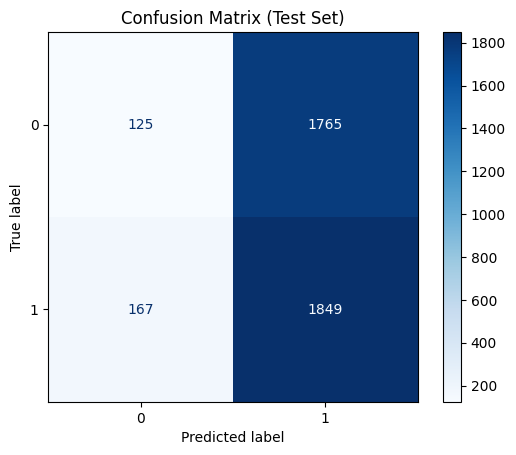

In [158]:
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(cmap='Blues', colorbar=True)
plt.title("Confusion Matrix (Test Set)")
plt.show()